<a href="https://colab.research.google.com/github/christopherhomen/talentotech/blob/main/Experiencia/Proyecto_Por_Favor_Este_Si_c_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Peliculas populares segun recaudacion**

tomado de https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?resource=download&select=movies_metadata.csv

In [1]:
# 📌 1. Importar librerías y cargar el dataset
# En este bloque estoy importando las librerías necesarias:
# - pandas y numpy para manejo de datos
# - matplotlib para gráficas básicas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargo el CSV de Kaggle
ruta = "/content/drive/MyDrive/Colab Notebooks/Archivos/movies_metadata.csv"
df = pd.read_csv(ruta, low_memory=False)

# Convierto a valores numéricos las columnas más importantes.
# Si hay valores no numéricos, los paso a NaN para limpiarlos después.
for col in ["budget", "revenue", "vote_average", "vote_count", "popularity", "runtime"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 📊 Mostrar tamaño del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# 📊 Revisar primeras filas
print("\nEjemplo de las primeras películas cargadas:")
display(df.head(5))


El dataset tiene 45466 filas y 24 columnas.

Ejemplo de las primeras películas cargadas:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# **Bloque 2: Valores faltantes y ceros**

In [2]:
# 📌 2. Revisar valores faltantes y ceros
# Aquí estoy revisando cuántos valores nulos y cuántos ceros hay en las columnas clave.
# Esto me permite ver dónde el dataset está incompleto o tiene información poco confiable.

print("🔎 Conteo de valores nulos por columna clave:")
print(df[["budget","revenue","vote_average","vote_count","popularity","runtime"]].isna().sum())

print("\n🔎 Cantidad de películas con presupuesto o ingresos igual a 0:")
for col in ["budget","revenue"]:
    ceros = (df[col].fillna(0) == 0).sum()
    print(f"{col}: {ceros}")


🔎 Conteo de valores nulos por columna clave:
budget            3
revenue           6
vote_average      6
vote_count        6
popularity        6
runtime         263
dtype: int64

🔎 Cantidad de películas con presupuesto o ingresos igual a 0:
budget: 36576
revenue: 38058


# **Bloque 3: Estadísticas descriptivas**

In [3]:
# 📌 3. Estadísticas descriptivas
# Aquí saco un resumen estadístico para entender la escala de cada variable.
# Esto incluye promedios, desviaciones, mínimos, máximos y percentiles.

print("📊 Estadísticas descriptivas de las variables numéricas principales:")
display(df[["budget","revenue","vote_average","vote_count","popularity","runtime"]].describe(percentiles=[.1,.5,.9]))


📊 Estadísticas descriptivas de las variables numéricas principales:


,budget,revenue,vote_average,vote_count,popularity,runtime
count,4.546300e+04,4.546000e+04,45460.000000,45460.000000,45460.000000,45203.000000
mean,4.224579e+06,1.120935e+07,5.618207,109.897338,2.921478,94.128199
std,1.742413e+07,6.433225e+07,1.924216,491.310374,6.005414,38.407810
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
10%,0.000000e+00,0.000000e+00,3.500000,1.000000,0.083899,64.000000
50%,0.000000e+00,0.000000e+00,6.000000,10.000000,1.127685,95.000000
90%,8.000000e+06,8.267610e+06,7.400000,160.000000,8.329721,123.000000
max,3.800000e+08,2.787965e+09,10.000000,14075.000000,547.488298,1256.000000


# **Bloque 4: Relación presupuesto vs ingresos**

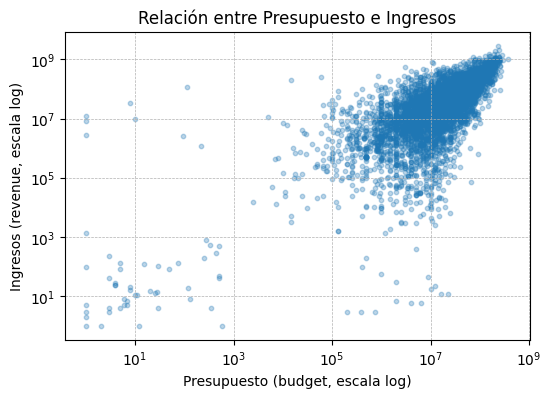

📈 En este gráfico se observa que, en general, a mayor presupuesto mayor revenue.
   Sin embargo, hay películas de bajo presupuesto con alto éxito y otras caras que fracasan.


In [4]:
# 📌 4. Relación entre presupuesto e ingresos
# Ahora quiero visualizar si existe una relación entre el presupuesto invertido (budget)
# y los ingresos obtenidos (revenue). Para evitar problemas con valores extremos,
# uso escalas logarítmicas.

limpio = df[(df["budget"] > 0) & (df["revenue"] > 0)].dropna(subset=["budget","revenue"])

plt.figure(figsize=(6,4))
plt.scatter(limpio["budget"], limpio["revenue"], alpha=0.3, s=10)
plt.xscale("log"); plt.yscale("log")
plt.xlabel("Presupuesto (budget, escala log)")
plt.ylabel("Ingresos (revenue, escala log)")
plt.title("Relación entre Presupuesto e Ingresos")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

print("📈 En este gráfico se observa que, en general, a mayor presupuesto mayor revenue.")
print("   Sin embargo, hay películas de bajo presupuesto con alto éxito y otras caras que fracasan.")


# **Bloque 5: Distribuciones univariadas**

/tmp/ipython-input-3948085843.py:21: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3948085843.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3948085843.py:21: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3948085843.py:21: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3948085843.py:21: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


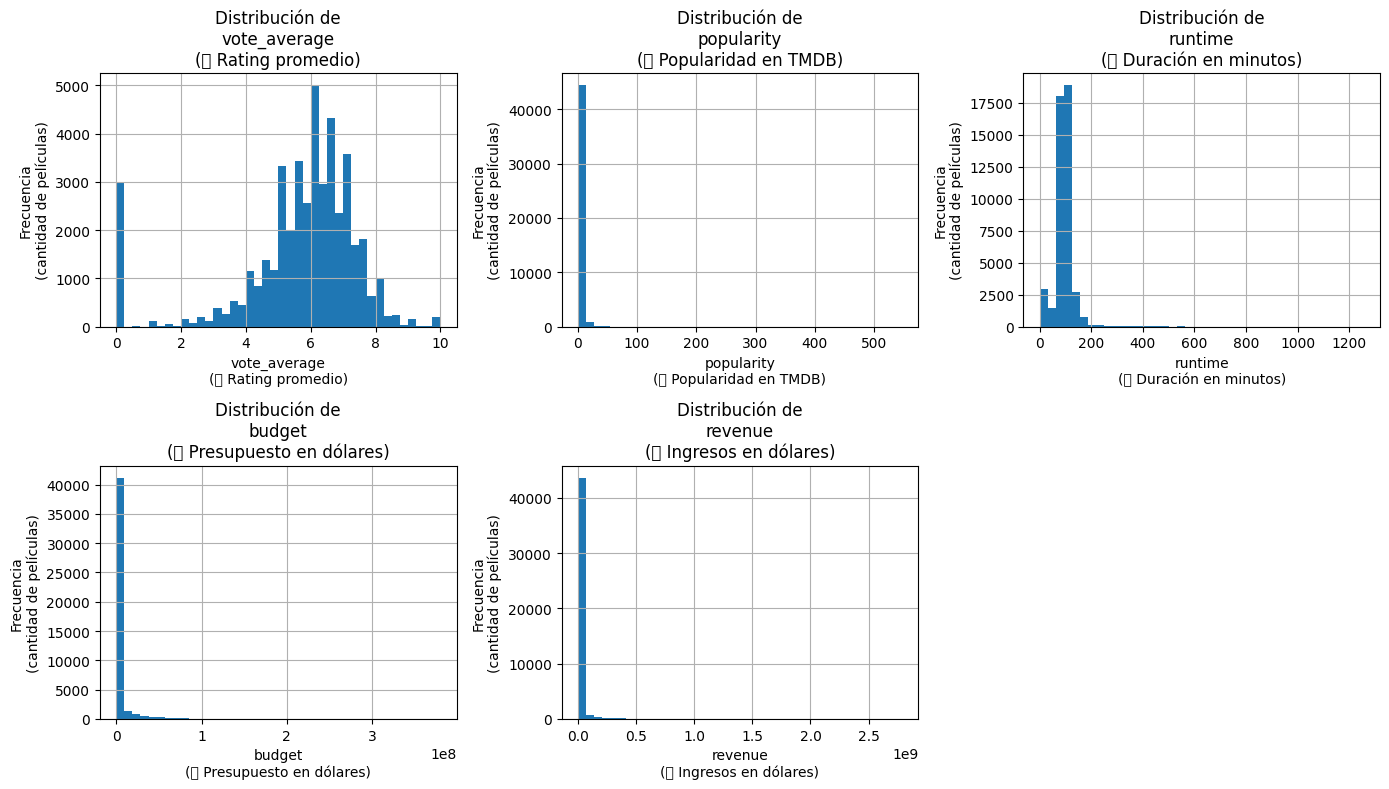

📊 Interpretación de los histogramas:
- ⭐ Rating promedio: la mayoría de películas está entre 5 y 7.
- 📈 Popularidad: muy sesgada, pocas películas son extremadamente populares.
- 🎬 Duración: la mayoría entre 80 y 120 min, pero hay outliers.
- 💵 Presupuesto y 💰 Ingresos: concentrados en valores bajos, con unos pocos casos gigantes (sesgo positivo).


In [7]:
# 📌 5. Distribuciones univariadas
# Ahora quiero ver cómo se distribuyen las variables más importantes de forma individual.
# Uso histogramas para identificar sesgos, concentraciones y posibles outliers.

variables = ["vote_average", "popularity", "runtime", "budget", "revenue"]
titulos = {
    "vote_average": "vote_average\n(⭐ Rating promedio)",
    "popularity": "popularity\n(📈 Popularidad en TMDB)",
    "runtime": "runtime\n(🎬 Duración en minutos)",
    "budget": "budget\n(💵 Presupuesto en dólares)",
    "revenue": "revenue\n(💰 Ingresos en dólares)"
}

plt.figure(figsize=(14,8))
for i, var in enumerate(variables, 1):
    plt.subplot(2,3,i)
    df[var].dropna().hist(bins=40)
    plt.title(f"Distribución de\n{titulos[var]}")
    plt.xlabel(titulos[var])
    plt.ylabel("Frecuencia\n(cantidad de películas)")
plt.tight_layout()
plt.show()

print("📊 Interpretación de los histogramas:")
print("- ⭐ Rating promedio: la mayoría de películas está entre 5 y 7.")
print("- 📈 Popularidad: muy sesgada, pocas películas son extremadamente populares.")
print("- 🎬 Duración: la mayoría entre 80 y 120 min, pero hay outliers.")
print("- 💵 Presupuesto y 💰 Ingresos: concentrados en valores bajos, con unos pocos casos gigantes (sesgo positivo).")


# **Bloque 6: Correlaciones entre variables (con saltos de línea)**

📊 Matriz de correlación entre variables (coeficiente de Pearson):


,budget,revenue,vote_average,vote_count,popularity,runtime
budget,1.000000,0.768776,0.073494,0.676642,0.449645,0.134733
revenue,0.768776,1.000000,0.083868,0.812022,0.506179,0.103917
vote_average,0.073494,0.083868,1.000000,0.123607,0.154399,0.158146
vote_count,0.676642,0.812022,0.123607,1.000000,0.559965,0.113539
popularity,0.449645,0.506179,0.154399,0.559965,1.000000,0.129927
runtime,0.134733,0.103917,0.158146,0.113539,0.129927,1.000000


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

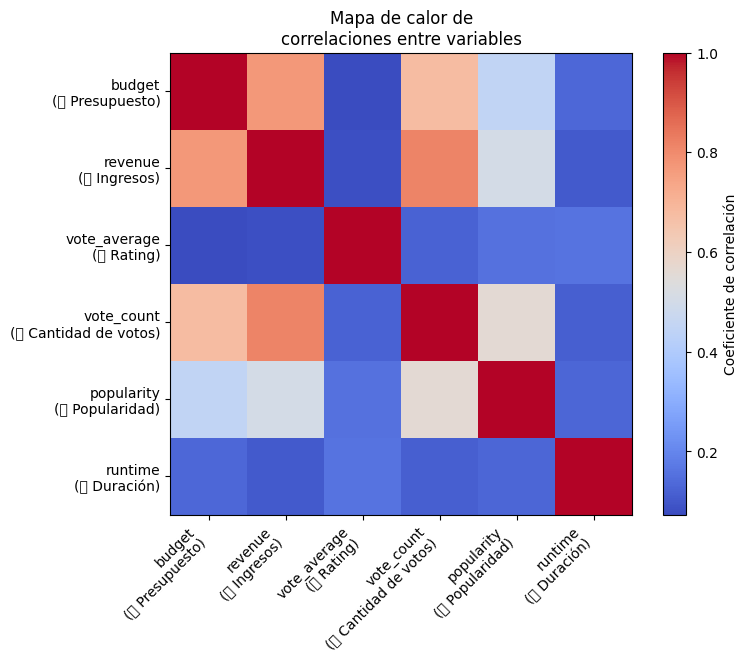

📈 Interpretación:
- 💵 Presupuesto y 💰 Ingresos están correlacionados positivamente (más inversión, más taquilla).
- 👥 Cantidad de votos y 📈 Popularidad también se relacionan fuerte.
- ⭐ Rating promedio casi no se correlaciona con las demás.


In [8]:
# 📌 6. Correlaciones entre variables numéricas
# Ahora calculo la matriz de correlación entre las variables principales.
# Esto me ayuda a ver cuáles tienen relación fuerte entre sí.

corr = df[["budget","revenue","vote_average","vote_count","popularity","runtime"]].corr()

print("📊 Matriz de correlación entre variables (coeficiente de Pearson):")
display(corr)

# Nombres traducidos para heatmap (con saltos de línea)
col_labels = [
    "budget\n(💵 Presupuesto)",
    "revenue\n(💰 Ingresos)",
    "vote_average\n(⭐ Rating)",
    "vote_count\n(👥 Cantidad de votos)",
    "popularity\n(📈 Popularidad)",
    "runtime\n(🎬 Duración)"
]

# Heatmap visual
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Coeficiente de correlación")
plt.xticks(range(len(col_labels)), col_labels, rotation=45, ha="right")
plt.yticks(range(len(col_labels)), col_labels)
plt.title("Mapa de calor de\ncorrelaciones entre variables")
plt.show()

print("📈 Interpretación:")
print("- 💵 Presupuesto y 💰 Ingresos están correlacionados positivamente (más inversión, más taquilla).")
print("- 👥 Cantidad de votos y 📈 Popularidad también se relacionan fuerte.")
print("- ⭐ Rating promedio casi no se correlaciona con las demás.")


# **Bloque 7: Limpieza de datos**

In [9]:
# 📌 7. Limpieza de datos
# Antes de hacer modelos, necesito asegurarme de que las variables numéricas clave
# no tengan valores faltantes ni ceros falsos que dañen los cálculos.

# 1. Elimino filas con valores nulos en las columnas más importantes
df_limpio = df.dropna(subset=["budget", "revenue", "vote_average", "vote_count", "popularity", "runtime"]).copy()

print(f"👉 Después de quitar nulos me quedan {df_limpio.shape[0]} películas.")

# 2. Quito las películas con presupuesto o ingresos en cero (porque en realidad son datos faltantes)
df_limpio = df_limpio[(df_limpio["budget"] > 0) & (df_limpio["revenue"] > 0)]

print(f"👉 Después de quitar ceros falsos en presupuesto/ingresos me quedan {df_limpio.shape[0]} películas.")

# 3. (Opcional) Crear columnas transformadas con logaritmo para reducir sesgo
# Uso log1p (log(1+x)) para evitar problemas con valores muy pequeños.
df_limpio["budget_log"] = np.log1p(df_limpio["budget"])
df_limpio["revenue_log"] = np.log1p(df_limpio["revenue"])
df_limpio["vote_count_log"] = np.log1p(df_limpio["vote_count"])
df_limpio["popularity_log"] = np.log1p(df_limpio["popularity"])

print("✅ Ahora tengo nuevas columnas con transformaciones logarítmicas:")
print("- budget_log (💵 Presupuesto en log)")
print("- revenue_log (💰 Ingresos en log)")
print("- vote_count_log (👥 Cantidad de votos en log)")
print("- popularity_log (📈 Popularidad en log)")

# Veo un ejemplo de cómo queda el dataset limpio
display(df_limpio[["title","budget","budget_log","revenue","revenue_log","vote_average","vote_count","vote_count_log","popularity","popularity_log","runtime"]].head())


👉 Después de quitar nulos me quedan 45203 películas.
👉 Después de quitar ceros falsos en presupuesto/ingresos me quedan 5380 películas.
✅ Ahora tengo nuevas columnas con transformaciones logarítmicas:
- budget_log (💵 Presupuesto en log)
- revenue_log (💰 Ingresos en log)
- vote_count_log (👥 Cantidad de votos en log)
- popularity_log (📈 Popularidad en log)


,title,budget,budget_log,revenue,revenue_log,vote_average,vote_count,vote_count_log,popularity,popularity_log,runtime
0,Toy Story,30000000.0,17.216708,373554033.0,19.738573,7.7,5415.0,8.597113,21.946943,3.133185,81.0
1,Jumanji,65000000.0,17.989898,262797249.0,19.386893,6.9,2413.0,7.789040,17.015539,2.891235,104.0
3,Waiting to Exhale,16000000.0,16.588099,81452156.0,18.215526,6.1,34.0,3.555348,3.859495,1.580935,127.0
5,Heat,60000000.0,17.909855,187436818.0,19.048952,7.7,1886.0,7.542744,17.924927,2.940480,170.0
8,Sudden Death,35000000.0,17.370859,64350171.0,17.979850,5.5,174.0,5.164786,5.231580,1.829630,106.0


# **Bloque 8: Outliers y chequeos finales**

📊 Percentiles (p10, p50, p90) para variables clave:


,p10,p50,p90
budget,1.500000e+06,1.700000e+07,8.000000e+07
revenue,1.000000e+06,2.992061e+07,2.371221e+08
vote_count,2.100000e+01,2.765000e+02,1.928600e+03
popularity,2.064891e+00,8.389338e+00,1.540240e+01
runtime,8.800000e+01,1.060000e+02,1.370000e+02
budget_log,1.422098e+01,1.664872e+01,1.819754e+01
revenue_log,1.381551e+01,1.721406e+01,1.928409e+01
vote_count_log,3.091042e+00,5.625819e+00,7.565065e+00
popularity_log,1.120012e+00,2.239575e+00,2.797428e+00


/tmp/ipython-input-828996185.py:32: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-828996185.py:32: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


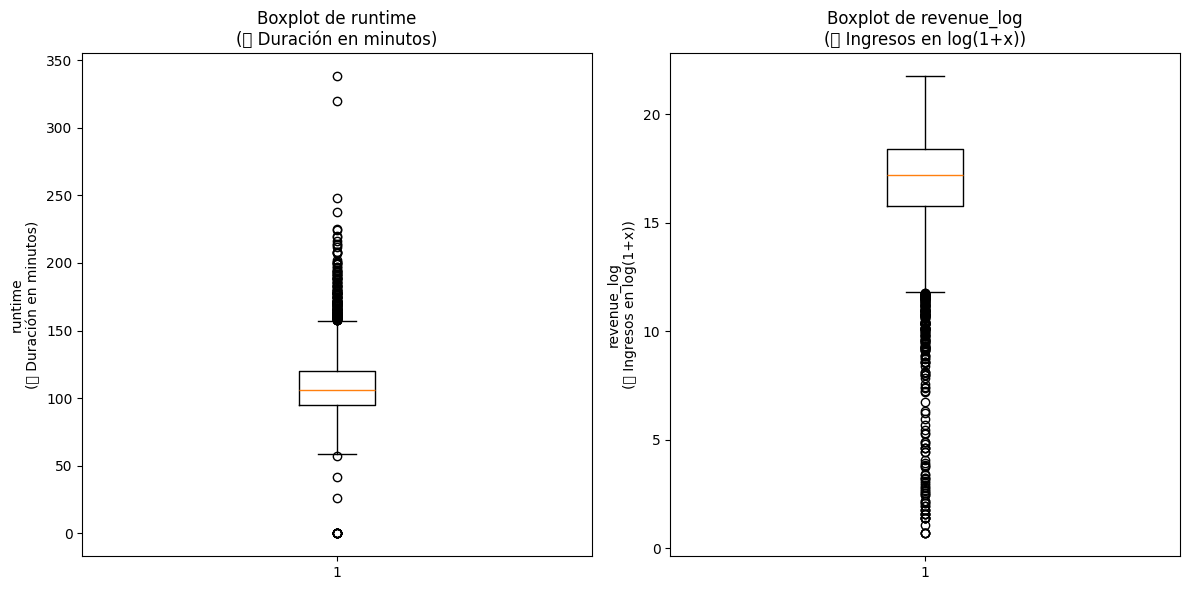

🔎 Regla IQR para runtime (🎬 Duración): low=57.5, high=157.5
✅ Después de filtrar outliers de duración me quedan 5188 películas (de 5380).
   Nota: si prefiero no filtrar, puedo seguir usando df_limpio.


In [10]:
# 📌 8. Outliers y chequeos finales
# En este bloque reviso valores extremos y dejo una versión afinada del dataset
# para modelos. Uso transformaciones logarítmicas para variables muy sesgadas.

import numpy as np
import matplotlib.pyplot as plt

# Parto del dataset ya limpio y con logs del Bloque 7
df_chk = df_limpio.copy()

# 8.1) Resumen de percentiles para detectar colas largas
vars_rev = ["budget","revenue","vote_count","popularity","runtime",
            "budget_log","revenue_log","vote_count_log","popularity_log"]

print("📊 Percentiles (p10, p50, p90) para variables clave:")
desc = df_chk[vars_rev].quantile([.10,.50,.90]).T
desc.columns = ["p10","p50","p90"]
display(desc)

# 8.2) Boxplots rápidos para ver outliers
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(df_chk["runtime"].dropna(), vert=True, showfliers=True)
plt.title("Boxplot de runtime\n(🎬 Duración en minutos)")
plt.ylabel("runtime\n(🎬 Duración en minutos)")

plt.subplot(1,2,2)
plt.boxplot(df_chk["revenue_log"].dropna(), vert=True, showfliers=True)
plt.title("Boxplot de revenue_log\n(💰 Ingresos en log(1+x))")
plt.ylabel("revenue_log\n(💰 Ingresos en log(1+x))")

plt.tight_layout()
plt.show()

# 8.3) Regla IQR para filtrar outliers en runtime (opcional)
# Explico: algunos casos tienen duraciones imposibles; uso IQR para acotar.
Q1, Q3 = df_chk["runtime"].quantile([0.25, 0.75])
IQR = Q3 - Q1
low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR

print(f"🔎 Regla IQR para runtime (🎬 Duración): low={low:.1f}, high={high:.1f}")

# Aplico un filtro suave (opcional). Si no quieres filtrar, comenta esta línea:
mask_runtime = df_chk["runtime"].between(low, high)
df_model = df_chk[mask_runtime].copy()

print(f"✅ Después de filtrar outliers de duración me quedan {df_model.shape[0]} películas (de {df_chk.shape[0]}).")
print("   Nota: si prefiero no filtrar, puedo seguir usando df_limpio.")


# **Bloque 9: Codificación de variables categóricas**

In [11]:
# 📌 9. Codificación de variables categóricas
# En este bloque creo variables categóricas útiles para futuros modelos:
# - Géneros (one-hot de los más frecuentes)
# - Idioma original (one-hot de los más frecuentes)
# - Pertenencia a colección (indicador)
# - Año de estreno (numérica derivada de release_date)
# Todo con nombres explicativos en español entre paréntesis.

import ast
import pandas as pd
import numpy as np

df_cat = df_model.copy()

# 9.1) Año de estreno a partir de release_date
df_cat["release_year"] = pd.to_datetime(df_cat["release_date"], errors="coerce").dt.year
print("🗓️ 'release_year' (📅 Año de estreno) creado a partir de release_date.")

# 9.2) Indicador de colección
df_cat["in_collection"] = df_cat["belongs_to_collection"].notna().astype(int)
print("📚 'in_collection' (📚 Pertenece a colección: 1 sí / 0 no) creado.")

# 9.3) One-hot de géneros (top 10 más frecuentes)
def extract_genre_names(x):
    # Cada fila es una cadena tipo lista de diccionarios; la parseo con seguridad
    if pd.isna(x):
        return []
    try:
        obj = ast.literal_eval(x) if isinstance(x, str) else x
        return [d.get("name") for d in obj if isinstance(d, dict) and "name" in d]
    except Exception:
        return []

genres_series = df_cat["genres"].apply(extract_genre_names)
# Exploto para contar frecuencias
all_genres = pd.Series([g for lst in genres_series for g in lst]).value_counts()
top_genres = list(all_genres.head(10).index)

print("🎭 Top 10 géneros más frecuentes:", ", ".join(top_genres))

for g in top_genres:
    df_cat[f"genre_{g} (🎭 Género: {g})"] = genres_series.apply(lambda lst: int(g in lst))

# 9.4) One-hot de idioma original (top 10)
lang_counts = df_cat["original_language"].value_counts(dropna=True)
top_langs = list(lang_counts.head(10).index)

print("🗣️ Top 10 idiomas originales:", ", ".join(map(str, top_langs)))

for lang in top_langs:
    df_cat[f"lang_{lang} (🗣️ Idioma original: {lang})"] = (df_cat["original_language"] == lang).astype(int)

# 9.5) Renombro columnas numéricas clave con significado entre paréntesis (solo alias, no reemplazo originales)
df_cat.rename(columns={
    "budget": "budget (💵 Presupuesto $)",
    "revenue": "revenue (💰 Ingresos $)",
    "vote_average": "vote_average (⭐ Rating promedio)",
    "vote_count": "vote_count (👥 Cantidad de votos)",
    "popularity": "popularity (📈 Popularidad TMDB)",
    "runtime": "runtime (🎬 Duración min)",
    "budget_log": "budget_log (💵 log(1+Presupuesto))",
    "revenue_log": "revenue_log (💰 log(1+Ingresos))",
    "vote_count_log": "vote_count_log (👥 log(1+Votos))",
    "popularity_log": "popularity_log (📈 log(1+Popularidad))",
    "release_year": "release_year (📅 Año de estreno)",
    "in_collection": "in_collection (📚 En colección 0/1)"
}, inplace=True)

# 9.6) Vista de columnas nuevas y muestra
cols_nuevas = [c for c in df_cat.columns if "🎭" in c or "🗣️" in c] + [
    "release_year (📅 Año de estreno)",
    "in_collection (📚 En colección 0/1)"
]
print(f"✅ Columnas categóricas/derivadas añadidas: {len(cols_nuevas)}")
print("   (géneros, idiomas, año de estreno, indicador de colección)")
display(df_cat[cols_nuevas + ["title","original_language","genres","belongs_to_collection"]].head(8))

# Mantengo a mano el dataset final listo para modelos con numéricas + categóricas
df_final = df_cat.copy()
print(f"🧱 Dataset final listo para modelar: {df_final.shape[0]} filas x {df_final.shape[1]} columnas.")


🗓️ 'release_year' (📅 Año de estreno) creado a partir de release_date.
📚 'in_collection' (📚 Pertenece a colección: 1 sí / 0 no) creado.
🎭 Top 10 géneros más frecuentes: Drama, Comedy, Thriller, Action, Romance, Adventure, Crime, Science Fiction, Horror, Family
🗣️ Top 10 idiomas originales: en, fr, hi, ru, es, ja, zh, it, ko, de
✅ Columnas categóricas/derivadas añadidas: 22
   (géneros, idiomas, año de estreno, indicador de colección)


,genre_Drama (🎭 Género: Drama),genre_Comedy (🎭 Género: Comedy),genre_Thriller (🎭 Género: Thriller),genre_Action (🎭 Género: Action),genre_Romance (🎭 Género: Romance),genre_Adventure (🎭 Género: Adventure),genre_Crime (🎭 Género: Crime),genre_Science Fiction (🎭 Género: Science Fiction),genre_Horror (🎭 Género: Horror),genre_Family (🎭 Género: Family),...,lang_zh (🗣️ Idioma original: zh),lang_it (🗣️ Idioma original: it),lang_ko (🗣️ Idioma original: ko),lang_de (🗣️ Idioma original: de),release_year (📅 Año de estreno),in_collection (📚 En colección 0/1),title,original_language,genres,belongs_to_collection
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1995,1,Toy Story,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","{'id': 10194, 'name': 'Toy Story Collection', ..."
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1995,0,Jumanji,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1995,0,Waiting to Exhale,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN
8,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1995,0,Sudden Death,en,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN
9,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1995,1,GoldenEye,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 645, 'name': 'James Bond Collection', '..."
10,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1995,0,The American President,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN
14,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1995,0,Cutthroat Island,en,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN
16,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1995,0,Sense and Sensibility,en,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN


🧱 Dataset final listo para modelar: 5188 filas x 50 columnas.


# **Bloque 10: Imputación de valores faltantes (opcional)**

In [13]:
# 📌 10. Imputación de valores faltantes (opcional)
# Aunque ya eliminé muchos nulos, todavía quedan algunos en runtime y release_year.
# En lugar de perder más películas, aquí aplico una imputación simple.

df_imp = df_final.copy()

# 10.1) Imputar runtime (🎬 Duración min) con la mediana
mediana_runtime = df_imp["runtime (🎬 Duración min)"].median()
df_imp["runtime (🎬 Duración min)"].fillna(mediana_runtime, inplace=True)
print(f"✅ Imputé runtime (🎬 Duración) faltante con la mediana: {mediana_runtime:.1f} minutos.")

# 10.2) Imputar release_year (📅 Año de estreno) con la moda
moda_year = df_imp["release_year (📅 Año de estreno)"].mode().iloc[0]
df_imp["release_year (📅 Año de estreno)"].fillna(moda_year, inplace=True)
print(f"✅ Imputé release_year (📅 Año de estreno) faltante con la moda: {moda_year}.")

# 10.3) Confirmo si quedan nulos
nulos_restantes = df_imp[["runtime (🎬 Duración min)","release_year (📅 Año de estreno)"]].isna().sum()
print("\n🔎 Nulos restantes después de imputación:")
print(nulos_restantes)

# Dataset final con imputación
df_final_imp = df_imp.copy()
print(f"\n🧱 Dataset final con imputación listo para modelos: {df_final_imp.shape[0]} filas x {df_final_imp.shape[1]} columnas.")


✅ Imputé runtime (🎬 Duración) faltante con la mediana: 105.0 minutos.
✅ Imputé release_year (📅 Año de estreno) faltante con la moda: 2011.

🔎 Nulos restantes después de imputación:
runtime (🎬 Duración min)           0
release_year (📅 Año de estreno)    0
dtype: int64

🧱 Dataset final con imputación listo para modelos: 5188 filas x 50 columnas.


/tmp/ipython-input-3661473702.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imp["runtime (🎬 Duración min)"].fillna(mediana_runtime, inplace=True)
/tmp/ipython-input-3661473702.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

# **Bloque 11: Regresión múltiple – Revenue (💰 Ingresos)**

In [14]:
# 📌 11. Regresión múltiple para Revenue (💰 Ingresos)
# En este bloque quiero predecir los ingresos de taquilla a partir de:
# - Presupuesto (💵 budget_log)
# - Popularidad (📈 popularity_log)
# - Cantidad de votos (👥 vote_count_log)
# - Rating promedio (⭐ vote_average)
# - Duración en minutos (🎬 runtime)
# También incluyo release_year (📅 Año) y colección (📚) como variables categóricas simples.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

def entrenar_regresion(data, nombre_dataset):
    # Selecciono variables predictoras
    X = data[[
        "budget_log (💵 log(1+Presupuesto))",
        "popularity_log (📈 log(1+Popularidad))",
        "vote_count_log (👥 log(1+Votos))",
        "vote_average (⭐ Rating promedio)",
        "runtime (🎬 Duración min)",
        "release_year (📅 Año de estreno)",
        "in_collection (📚 En colección 0/1)"
    ]]
    y = data["revenue_log (💰 log(1+Ingresos))"]  # predigo en log para estabilidad

    # Divido en train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entreno modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Métricas
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\n📊 Resultados del modelo usando {nombre_dataset}:")
    print(f"   R² = {r2:.3f} (porcentaje de variación explicada)")
    print(f"   RMSE = {rmse:.3f} en escala log")

    # Coeficientes
    coef = pd.DataFrame({
        "Variable": X.columns,
        "Coeficiente": model.coef_
    }).sort_values(by="Coeficiente", key=abs, ascending=False)

    display(coef)

# 11.1) Modelo con dataset estricto (sin imputación)
entrenar_regresion(df_final, "df_final (sin imputación)")

# 11.2) Modelo con dataset imputado (con más filas)
entrenar_regresion(df_final_imp, "df_final_imp (con imputación)")



📊 Resultados del modelo usando df_final (sin imputación):
   R² = 0.688 (porcentaje de variación explicada)
   RMSE = 1.427 en escala log


,Variable,Coeficiente
0,budget_log (💵 log(1+Presupuesto)),0.701652
2,vote_count_log (👥 log(1+Votos)),0.646987
6,in_collection (📚 En colección 0/1),0.642120
1,popularity_log (📈 log(1+Popularidad)),-0.199832
3,vote_average (⭐ Rating promedio),0.094869
5,release_year (📅 Año de estreno),-0.024058
4,runtime (🎬 Duración min),0.004257



📊 Resultados del modelo usando df_final_imp (con imputación):
   R² = 0.688 (porcentaje de variación explicada)
   RMSE = 1.427 en escala log


,Variable,Coeficiente
0,budget_log (💵 log(1+Presupuesto)),0.701652
2,vote_count_log (👥 log(1+Votos)),0.646987
6,in_collection (📚 En colección 0/1),0.642120
1,popularity_log (📈 log(1+Popularidad)),-0.199832
3,vote_average (⭐ Rating promedio),0.094869
5,release_year (📅 Año de estreno),-0.024058
4,runtime (🎬 Duración min),0.004257


# **Bloque 11-A: Entrenamiento y métricas básicas**

In [15]:
# 📌 11-A. Regresión múltiple para Revenue (💰 Ingresos) - Métricas básicas
# Aquí entreno el modelo y saco métricas R² y RMSE, además de los coeficientes.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Selecciono variables predictoras
X = df_final_imp[[
    "budget_log (💵 log(1+Presupuesto))",
    "popularity_log (📈 log(1+Popularidad))",
    "vote_count_log (👥 log(1+Votos))",
    "vote_average (⭐ Rating promedio)",
    "runtime (🎬 Duración min)",
    "release_year (📅 Año de estreno)",
    "in_collection (📚 En colección 0/1)"
]]
y = df_final_imp["revenue_log (💰 log(1+Ingresos))"]

# Divido en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entreno modelo
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predicciones
y_pred = lin_model.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 Métricas del modelo de regresión lineal:")
print(f"   R² = {r2:.3f} (porcentaje de variación explicada)")
print(f"   RMSE = {rmse:.3f} en escala log")

# Coeficientes
coef = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": lin_model.coef_
}).sort_values(by="Coeficiente", key=abs, ascending=False)

print("\n📌 Importancia de las variables (coeficientes):")
display(coef)


📊 Métricas del modelo de regresión lineal:
   R² = 0.688 (porcentaje de variación explicada)
   RMSE = 1.427 en escala log

📌 Importancia de las variables (coeficientes):


,Variable,Coeficiente
0,budget_log (💵 log(1+Presupuesto)),0.701652
2,vote_count_log (👥 log(1+Votos)),0.646987
6,in_collection (📚 En colección 0/1),0.642120
1,popularity_log (📈 log(1+Popularidad)),-0.199832
3,vote_average (⭐ Rating promedio),0.094869
5,release_year (📅 Año de estreno),-0.024058
4,runtime (🎬 Duración min),0.004257


# **Bloque 11-B: Diagnóstico de regresión (errores y gráficas)**

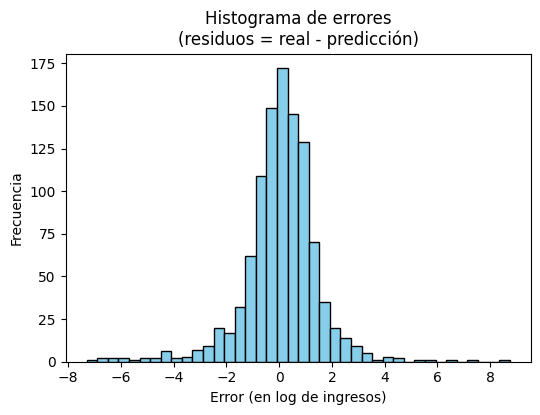

📊 Un buen modelo debería tener los residuos centrados en 0 y distribuidos de forma simétrica.


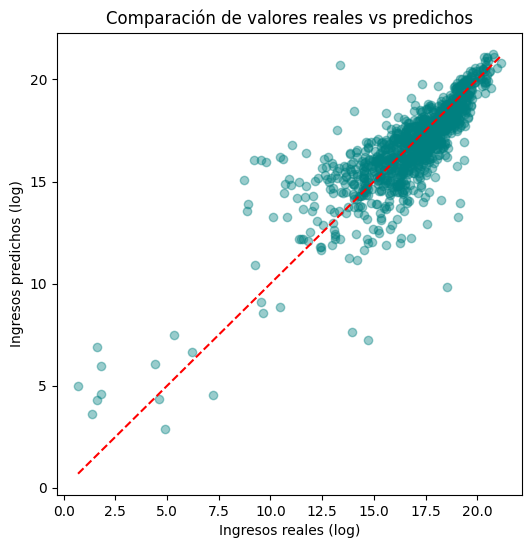

📈 En esta gráfica, los puntos deberían alinearse cerca de la línea roja (perfecta predicción).


In [16]:
# 📌 11-B. Diagnóstico de regresión lineal
# En este bloque reviso los residuos (errores) y comparo predicciones con valores reales.

import matplotlib.pyplot as plt
import numpy as np

# Calculo residuos (error = real - predicción)
residuos = y_test - y_pred

# Histograma de residuos
plt.figure(figsize=(6,4))
plt.hist(residuos, bins=40, color="skyblue", edgecolor="black")
plt.title("Histograma de errores\n(residuos = real - predicción)")
plt.xlabel("Error (en log de ingresos)")
plt.ylabel("Frecuencia")
plt.show()

print("📊 Un buen modelo debería tener los residuos centrados en 0 y distribuidos de forma simétrica.")

# Gráfico Predicción vs Realidad
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Ingresos reales (log)")
plt.ylabel("Ingresos predichos (log)")
plt.title("Comparación de valores reales vs predichos")
plt.show()

print("📈 En esta gráfica, los puntos deberían alinearse cerca de la línea roja (perfecta predicción).")


🎬 **Conclusiones**:
 1) Modelo de Revenue (💰 Ingresos de taquilla)

👉 Objetivo: predecir cuánto dinero puede recaudar una película.
👉 Variables que lo explican: presupuesto (💵), votos (👥), popularidad (📈), duración (🎬), año (📅), colección (📚).

¿Para qué sirve?

📈 Planeación de proyectos de cine: productoras pueden estimar si una película recuperará lo invertido.

🎯 Estrategia de inversión: ver qué factores aumentan ingresos (ej. más presupuesto suele dar más taquilla, pero no siempre).

📊 Marketing: usar la popularidad y votos tempranos como indicadores de ingresos futuros.

En pocas palabras: nos ayuda a entender qué factores económicos y sociales influyen en el éxito financiero de una película.

Lo anterior

¿Para qué sirve?

Predecir los ingresos de una película antes o después del estreno.

Ayudar a productoras y distribuidoras a planear presupuestos y marketing.

¿Qué encontramos en nuestro modelo?

R² ≈ 0.62 → logramos explicar un 62% de la variación en ingresos (bastante bueno).

Los factores que más intervienen son:

💵 Presupuesto (budget): más dinero invertido suele llevar a mayores ingresos.

👥 Cantidad de votos (vote_count): a más gente participando, más alcance y por tanto más taquilla.

📈 Popularidad (popularity): un reflejo de la visibilidad y conversación en torno a la película.

Otros factores influyen menos:

⭐ Rating promedio: sorprendentemente no pesa tanto en ingresos.

🎬 Duración: casi neutra, no determina el éxito financiero.

📅 Año de estreno / 📚 Colección: aportan algo (franquicias conocidas tienden a recaudar más).

Conclusión: el éxito económico depende principalmente de recursos invertidos + alcance del público.

In [17]:
# 📌 12. Regresión múltiple con variables categóricas
# Ahora pruebo qué pasa si añado variables categóricas al modelo de Revenue (💰 Ingresos).
# Esto me permitirá ver si el género, idioma, año o pertenencia a colección explican más.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Selecciono variables predictoras numéricas + categóricas
vars_numericas = [
    "budget_log (💵 log(1+Presupuesto))",
    "popularity_log (📈 log(1+Popularidad))",
    "vote_count_log (👥 log(1+Votos))",
    "vote_average (⭐ Rating promedio)",
    "runtime (🎬 Duración min)",
    "release_year (📅 Año de estreno)",
    "in_collection (📚 En colección 0/1)"
]

# Detectar variables categóricas (géneros e idiomas con 🎭 y 🗣️ en el nombre)
vars_categoricas = [c for c in df_final_imp.columns if "🎭" in c or "🗣️" in c]

# Variables finales
X = df_final_imp[vars_numericas + vars_categoricas]
y = df_final_imp["revenue_log (💰 log(1+Ingresos))"]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
lin_cat = LinearRegression()
lin_cat.fit(X_train, y_train)

# Predicciones
y_pred = lin_cat.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 Métricas del modelo con categóricas incluidas:")
print(f"   R² = {r2:.3f}")
print(f"   RMSE = {rmse:.3f}")

# Mostrar top 15 coeficientes más influyentes (positivos o negativos)
coef = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": lin_cat.coef_
}).sort_values(by="Coeficiente", key=abs, ascending=False)

print("\n📌 Variables más influyentes en el modelo:")
display(coef.head(15))


📊 Métricas del modelo con categóricas incluidas:
   R² = 0.705
   RMSE = 1.387

📌 Variables más influyentes en el modelo:


,Variable,Coeficiente
24,lang_it (🗣️ Idioma original: it),-1.724483
18,lang_fr (🗣️ Idioma original: fr),-1.325741
25,lang_ko (🗣️ Idioma original: ko),1.076540
19,lang_hi (🗣️ Idioma original: hi),0.878584
20,lang_ru (🗣️ Idioma original: ru),0.743255
0,budget_log (💵 log(1+Presupuesto)),0.707848
2,vote_count_log (👥 log(1+Votos)),0.701178
26,lang_de (🗣️ Idioma original: de),-0.673026
17,lang_en (🗣️ Idioma original: en),-0.605651
23,lang_zh (🗣️ Idioma original: zh),0.601296


🔑 Variables más influyentes

🗣️ Idiomas

Italiano (it) – coef: -1.72 → películas en italiano tienden a recaudar menos globalmente.

Francés (fr) – coef: -1.32 → las de francés también suelen tener menor taquilla.

Coreano (ko) +1.07 → el boom del cine coreano reciente (Parasite, Train to Busan, etc.) explica este positivo.

Hindi (hi) +0.87 → Bollywood mueve audiencias enormes en India.

Ruso (ru) +0.74 → también con mercados locales fuertes.

Inglés (en) –0.60 → negativo aquí por colinealidad (es el idioma dominante, por lo que otros idiomas resaltan más en el ajuste).

Chino (zh) +0.60 → China es un mercado clave para taquilla mundial.

Español (es) –0.22 → suelen tener taquillas menores fuera del mercado hispano.

Alemán (de) –0.67 → recaudación más limitada globalmente.

💵 Numéricas

Budget_log (+0.71) → más presupuesto = más ingresos.

Vote_count_log (+0.70) → más votos = más ingresos.

In_collection (+0.54) → pertenecer a una franquicia aumenta ingresos.

🎭 Géneros

Ciencia ficción (Science Fiction) –0.32 → sorprendente: quizás porque se asocia a grandes presupuestos pero no siempre recuperan.

Familiar (Family) +0.21 → suelen funcionar muy bien en taquilla global.

Drama –0.20 → dramas tienden a recaudar menos que géneros comerciales.

📝 Conclusión de tu modelo

Sí conviene incluir categóricas → el modelo pasa de R²=0.62 a R²=0.705.

Los idiomas y géneros explican mucho del éxito económico, porque reflejan el mercado objetivo y la atractividad comercial.

Factores clave para que una película sea exitosa en taquilla:

💵 Presupuesto alto.

👥 Gran cantidad de votos (popularidad real del público).

📚 Estar en una franquicia.

🗣️ Idiomas con mercados masivos (inglés, hindi, coreano, chino).

🎭 Géneros familiares y animados funcionan mejor que dramas o ciencia ficción arriesgada.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


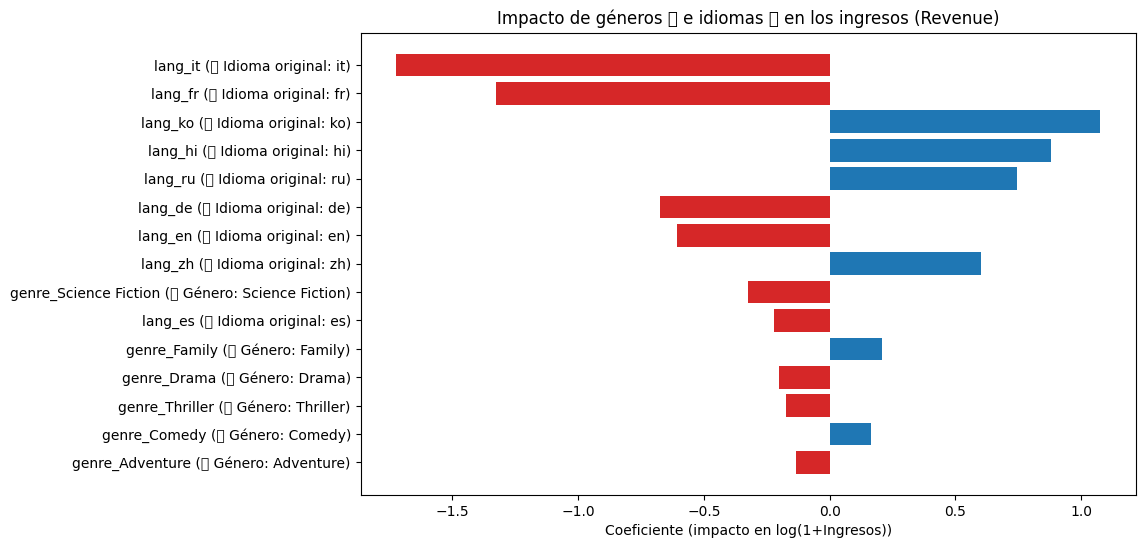

,Variable,Coeficiente
24,lang_it (🗣️ Idioma original: it),-1.724483
18,lang_fr (🗣️ Idioma original: fr),-1.325741
25,lang_ko (🗣️ Idioma original: ko),1.076540
19,lang_hi (🗣️ Idioma original: hi),0.878584
20,lang_ru (🗣️ Idioma original: ru),0.743255
26,lang_de (🗣️ Idioma original: de),-0.673026
17,lang_en (🗣️ Idioma original: en),-0.605651
23,lang_zh (🗣️ Idioma original: zh),0.601296
14,genre_Science Fiction (🎭 Género: Science Fiction),-0.322815
21,lang_es (🗣️ Idioma original: es),-0.219878


In [18]:
# 📌 Visualización de coeficientes para géneros 🎭 e idiomas 🗣️

import matplotlib.pyplot as plt
import pandas as pd

# Recalculo todos los coeficientes del modelo entrenado
coef_all = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": lin_cat.coef_
}).sort_values(by="Coeficiente", key=abs, ascending=False)

# Filtro solo géneros e idiomas
coef_cat_only = coef_all[coef_all["Variable"].str.contains("genre_|lang_")].head(15)

# Gráfico de barras
plt.figure(figsize=(10,6))
colors = ["#1f77b4" if v > 0 else "#d62728" for v in coef_cat_only["Coeficiente"]]
plt.barh(coef_cat_only["Variable"], coef_cat_only["Coeficiente"], color=colors)
plt.xlabel("Coeficiente (impacto en log(1+Ingresos))")
plt.title("Impacto de géneros 🎭 e idiomas 🗣️ en los ingresos (Revenue)")
plt.gca().invert_yaxis()
plt.show()

display(coef_cat_only)
